# Detecting and Predicting Suicidal Behaviour

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_who =pd.read_csv("who_suicide_statistics.csv") 
df_in = pd.read_csv("Suicides in India 2001-2012.csv")

In [3]:
df_who.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
df_in.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [5]:
df_who.shape

(43776, 6)

In [6]:
df_in.shape

(237519, 7)

In [7]:
df_who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [9]:
df_who.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [10]:
df_in.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


# Worldwide suicide analysis(WHO data)

In [11]:
df_who.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

## 1.Handling Missing data

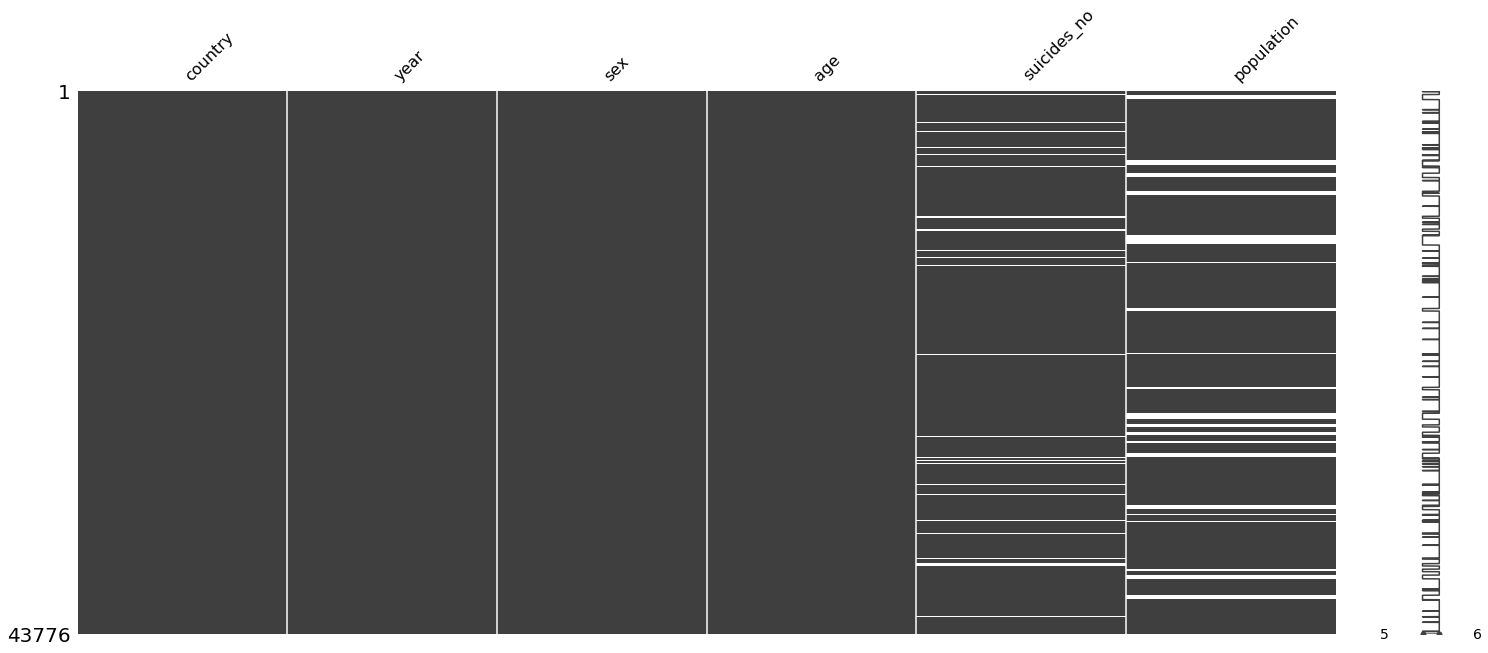

In [20]:
missingno.matrix(df_who)

In [13]:
df_who.isnull().sum().sort_values(ascending=False).head(10)

population     5460
suicides_no    2256
age               0
sex               0
year              0
country           0
dtype: int64

In [21]:
df_who['suicides_no'].fillna(0 , inplace = True)

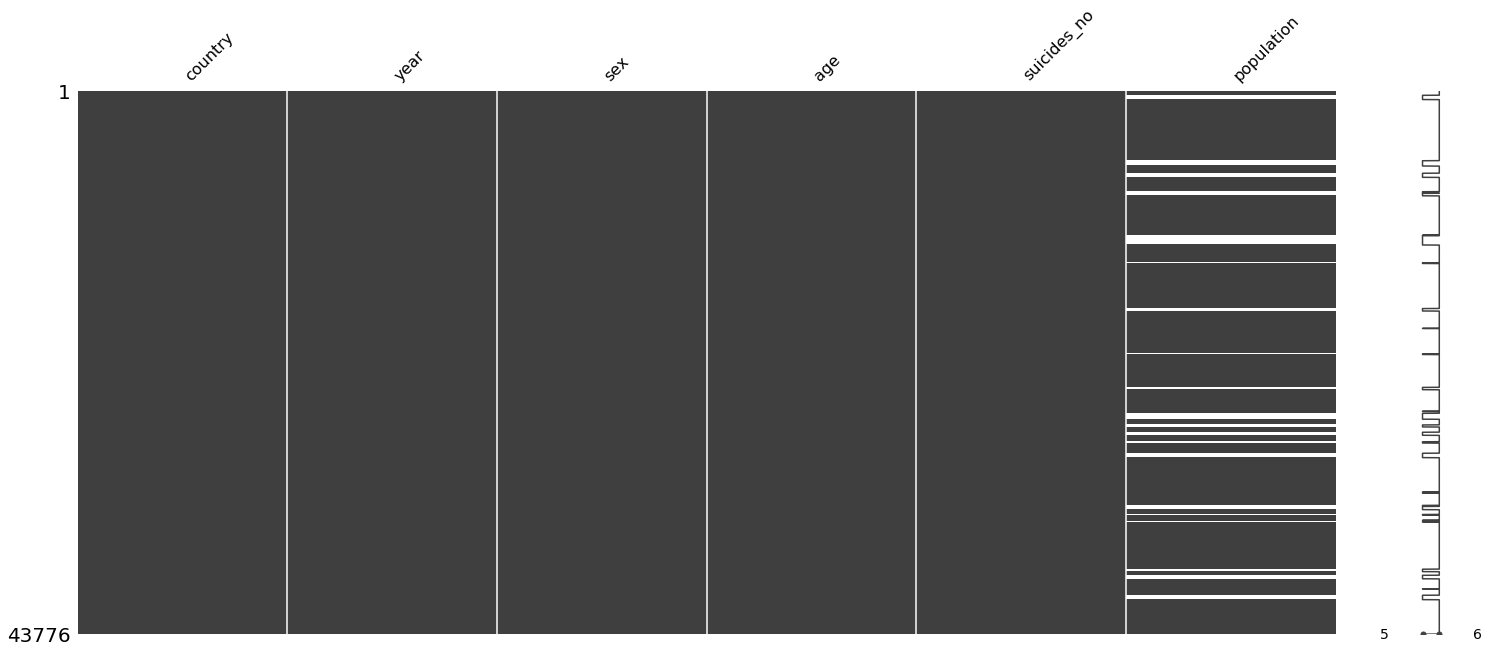

In [22]:
missingno.matrix(df_who)

In [23]:
df_who['population'].fillna((df_who['population'].mean()), inplace = True)

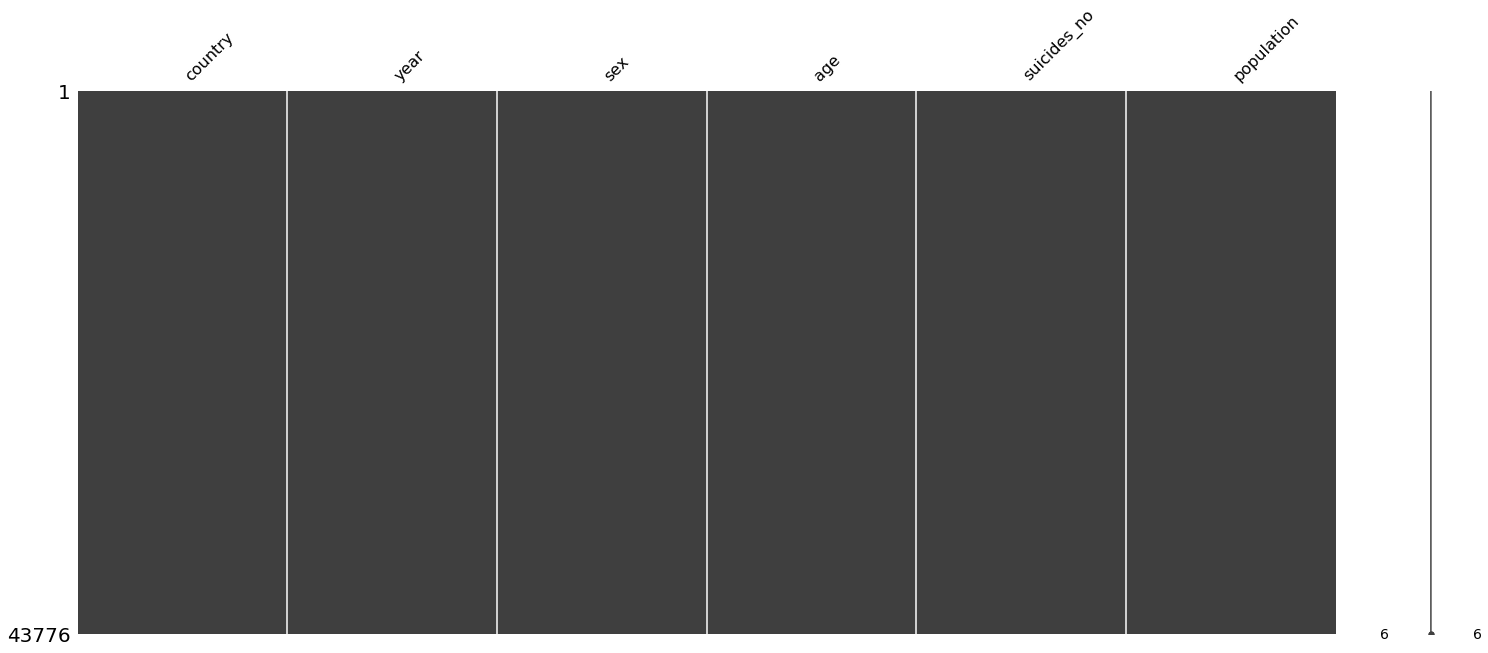

In [24]:
missingno.matrix(df_who)

In [98]:
df_who['suicides_no'] = df_who['suicides_no'].astype(int)

## 1.Yearwise Suicide Rate Distribution

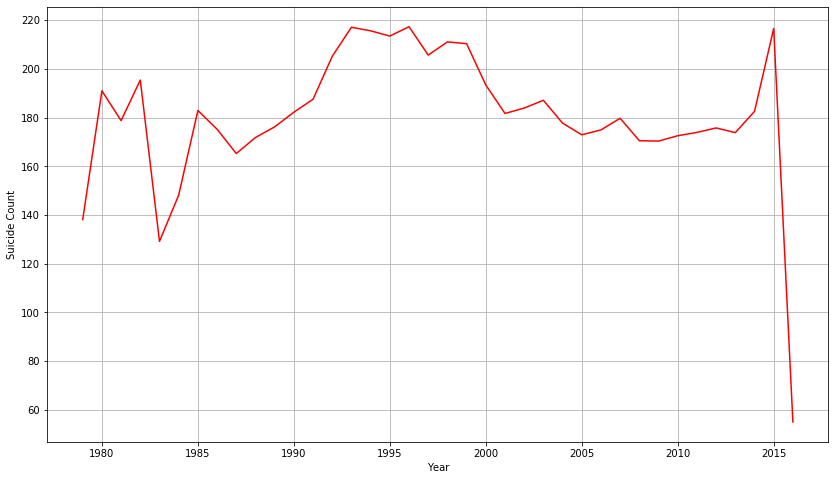

In [61]:
df_yr = df_who.groupby('year')

plt.figure(figsize=(14,8))
ap = sns.lineplot(data = df_yr.mean()['suicides_no'], markers= True,color = "red")
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.grid()
plt.show()

# 2. Top 10 countries with highest suicide rate

In [42]:
df_who.groupby('country')["suicides_no"].mean().sort_values(ascending=False).head(10)

country
Russian Federation          3474.518519
United States of America    2634.651316
Japan                       2111.743243
Germany                      933.532051
Ukraine                      922.146465
France                       915.509259
Republic of Korea            703.575269
Brazil                       564.918919
Sri Lanka                    420.557292
Poland                       388.653153
Name: suicides_no, dtype: float64

In [44]:
df_countryH = pd.DataFrame(df_who.groupby(['country'])['suicides_no'].sum().reset_index())
df_countryH.sort_values(by = ['suicides_no'], ascending = False, inplace = True)

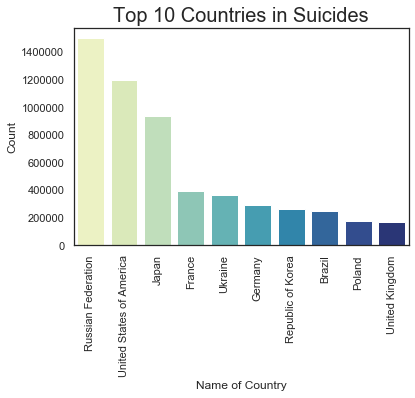

In [161]:
sns.barplot(df_countryH['country'].head(10), y = df_countryH['suicides_no'].head(10), data = df_countryH, palette = "YlGnBu")
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

# 3. Top 10 countries with lowest suicide rate

In [51]:
df_who.groupby('country')["suicides_no"].mean().sort_values(ascending=True).head(10)

country
Montserrat                     0.003086
Anguilla                       0.005747
Turks and Caicos Islands       0.016667
Falkland Islands (Malvinas)    0.016667
British Virgin Islands         0.023810
Antigua and Barbuda            0.032738
Cayman Islands                 0.051075
Saint Kitts and Nevis          0.069444
Saint Pierre and Miquelon      0.083333
Sao Tome and Principe          0.111111
Name: suicides_no, dtype: float64

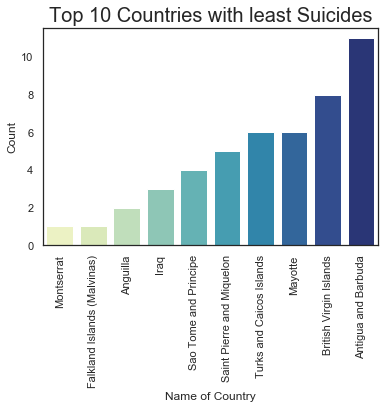

In [162]:
df_countryL = pd.DataFrame(df_who.groupby(['country'])['suicides_no'].sum().reset_index())
df_countryL.sort_values(by = ['suicides_no'], ascending = True, inplace = True)

sns.barplot(df_countryL['country'].head(10), y = df_countryL['suicides_no'].head(10), data = df_countryL, palette = "YlGnBu")
plt.title('Top 10 Countries with least Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

## 4. Gender-Wise suicide rate

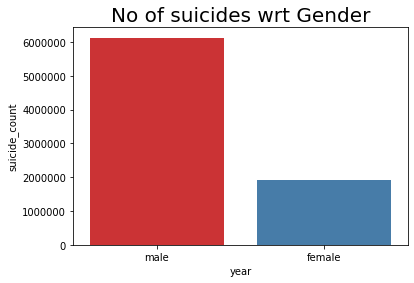

In [41]:
df_gender = pd.DataFrame(df_who.groupby(['sex'])['suicides_no'].sum().reset_index())
df_gender.sort_values(by = ['suicides_no'], ascending = False, inplace = True)

sns.barplot(df_gender['sex'], y = df_gender['suicides_no'], data = df_gender, palette = 'Set1')
plt.title('No of suicides wrt Gender', fontsize = 20)
plt.xlabel('year')
plt.ylabel('suicide_count')
plt.show()

## 5. Suicide Rate Distribution based on Age groups

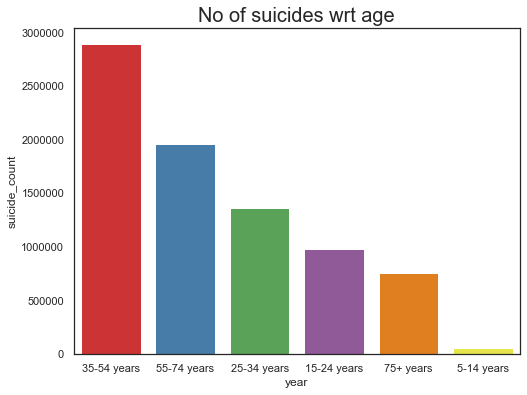

In [114]:
df_age= pd.DataFrame(df_who.groupby(['age'])['suicides_no'].sum().reset_index())
df_age.sort_values(by = ['suicides_no'], ascending = False, inplace = True)
plt.figure(figsize=(8,6))
sns.barplot(df_age['age'], y = df_age['suicides_no'], data = df_age, palette = 'Set1')
plt.title('No of suicides wrt age', fontsize = 20)
plt.xlabel('year')
plt.ylabel('suicide_count')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='age', data=df_who)

# Indian Suicide Rate Analysis

## Handling Missing Values

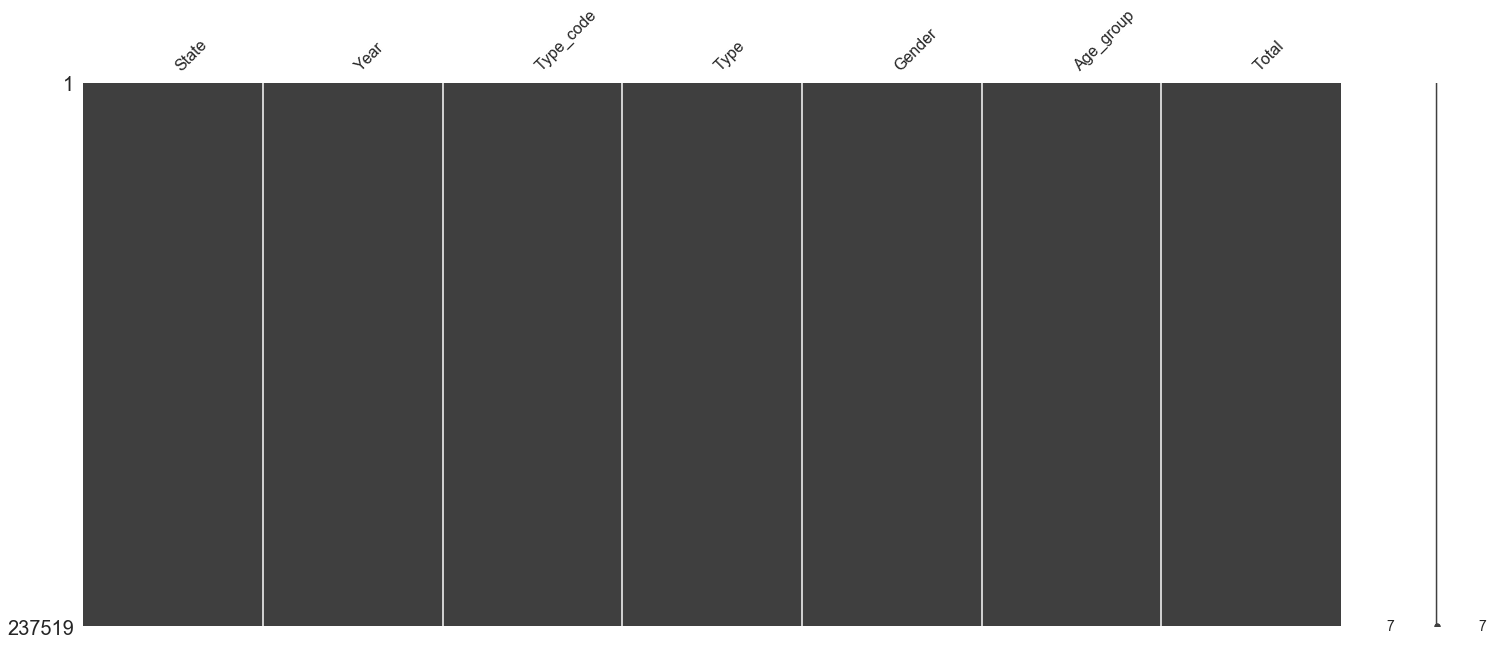

In [103]:
missingno.matrix(df_in)

No missing values

In [104]:
df_in.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

## 1.Yearwise Suicide Rate Distribution

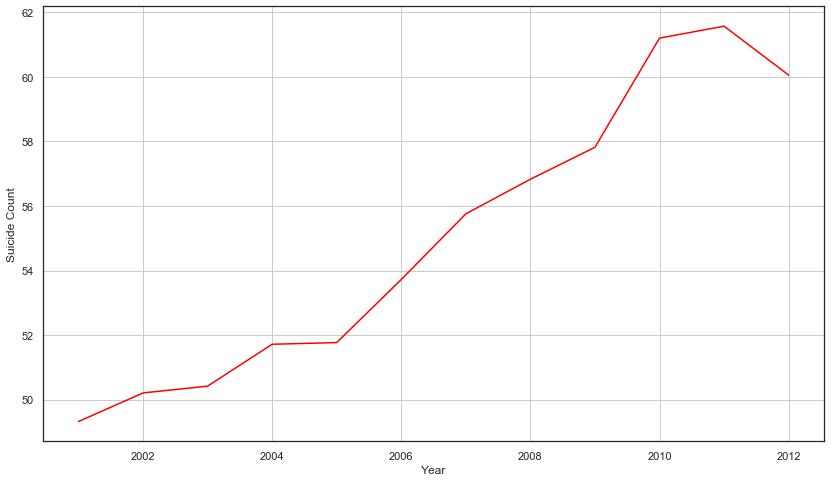

In [115]:
df_yr_in = df_in.groupby('Year')

plt.figure(figsize=(14,8))
ap = sns.lineplot(data = df_yr_in.mean()['Total'], markers= True,color = "red")
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.grid()
plt.show()

## 2. Statewise suicide rates

In [119]:
df_states1 = df_in[['State', 'Total']].copy()

In [142]:
df_states1 = df_states1[df_states1.State != 'Total (All India)']

In [144]:
df_states1 = df_states1[df_states1.State != 'Total (States)']

In [145]:
df_states1 = df_states1[df_states1.State != 'Total (Uts)']

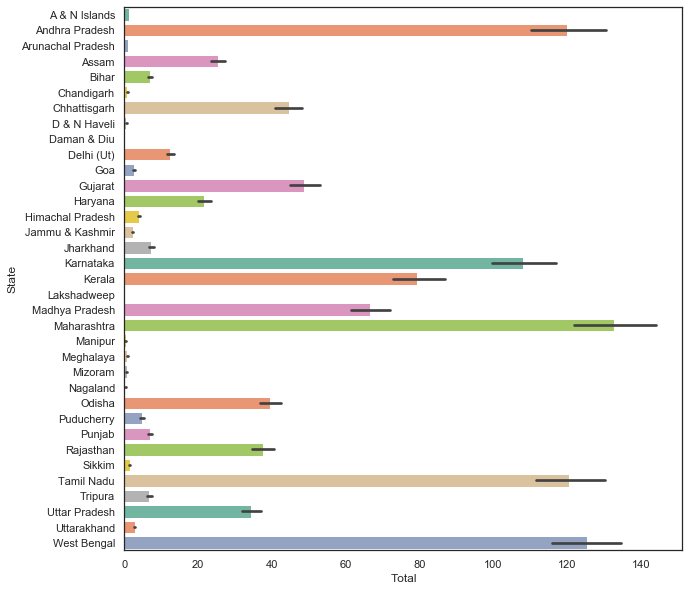

In [150]:
plt.figure(figsize=(10,10))
sns.barplot(x='Total', y='State', data = df_states1, palette = "Set2")

In [ ]:
sns.barplot(df_countryH['country'].head(10), y = df_countryH['suicides_no'].head(10), data = df_countryH, palette = "YlGnBu")
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 80)
plt.ylabel('Count')
plt.show()

## Top 10 states with highest suicide rates

In [154]:
df_statesH = pd.DataFrame(df_states1.groupby(['State'])['Total'].sum().reset_index())
df_statesH.sort_values(by = ['Total'], ascending = False, inplace = True)

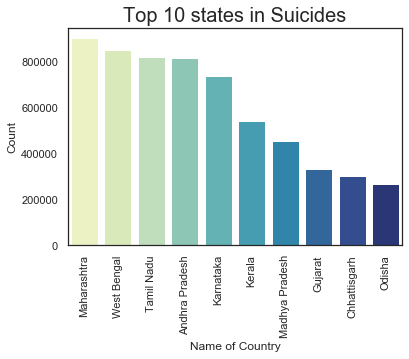

In [160]:
sns.barplot(df_statesH['State'].head(10), y = df_statesH['Total'].head(10), data = df_statesH, palette = "YlGnBu")
plt.title('Top 10 states in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

#### Maharashtra tops the list. Kerala comes in 6th position with a concerning suicide rate.

## Top 10 States with lowest suicide rates

In [157]:
df_statesL = pd.DataFrame(df_states1.groupby(['State'])['Total'].sum().reset_index())
df_statesL.sort_values(by = ['Total'], ascending = True, inplace = True)

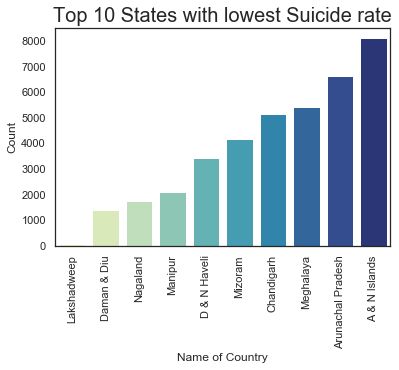

In [159]:
sns.barplot(df_statesL['State'].head(10), y = df_statesL['Total'].head(10), data = df_statesL, palette = "YlGnBu")
plt.title('Top 10 States with lowest Suicide rate', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

## 3. Genderwise suicide rates

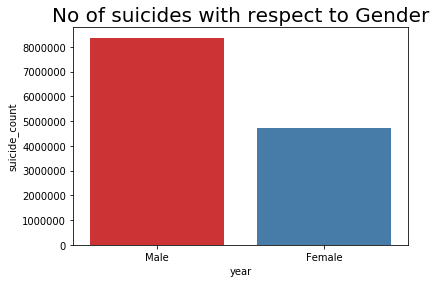

In [26]:
df_gender_in = pd.DataFrame(df_in.groupby(['Gender'])['Total'].sum().reset_index())
df_gender_in.sort_values(by = ['Total'], ascending = False, inplace = True)

sns.barplot(df_gender_in['Gender'], y = df_gender_in['Total'], data = df_gender_in, palette = 'Set1')
plt.title('No of suicides with respect to Gender', fontsize = 20)
plt.xlabel('year')
plt.ylabel('suicide_count')
plt.show()

## 4. Suicides w.r.t age groups

In [28]:
df_age_in = df_in[df_in.Age_group != '0-100+']

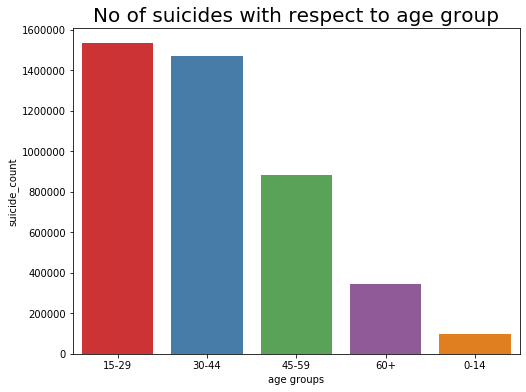

In [29]:
df_age_in= pd.DataFrame(df_age_in.groupby(['Age_group'])['Total'].sum().reset_index())
df_age_in.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(8,6))
sns.barplot(df_age_in['Age_group'], y = df_age_in['Total'], data = df_age_in, palette = 'Set1')
plt.title('No of suicides with respect to age group', fontsize = 20)
plt.xlabel('age groups')
plt.ylabel('suicide_count')
plt.show()

## Suicide Trends in two age groups

In [17]:
df_age15 = df_in[df_in.Age_group == '15-29']

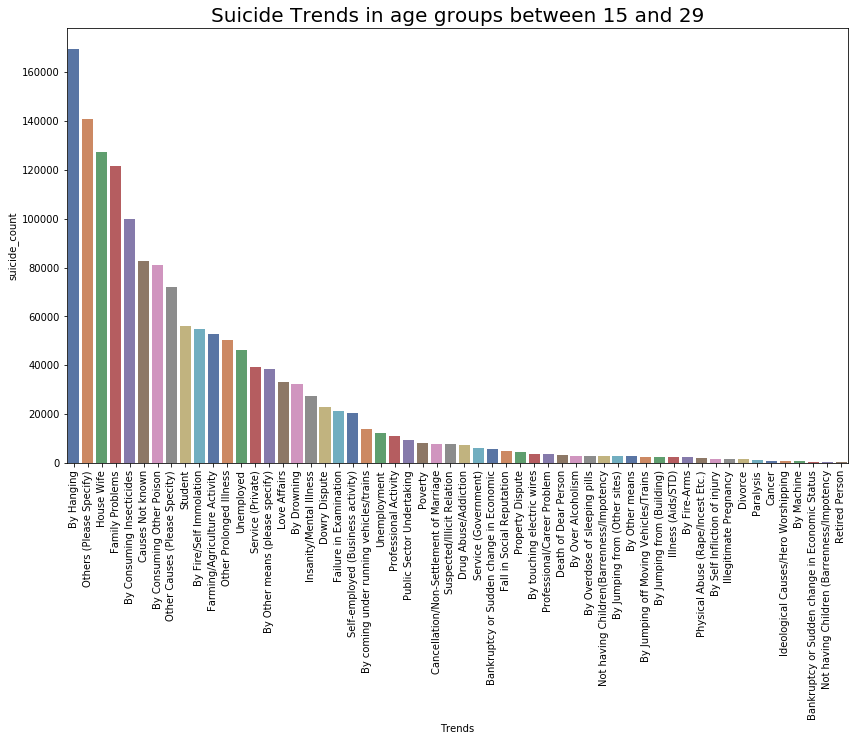

In [25]:
x= pd.DataFrame(df_age15.groupby(['Type'])['Total'].sum().reset_index())
x.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(14,8))
sns.barplot(x['Type'], y = x['Total'], data = x, palette = 'deep')
plt.title('Suicide Trends in age groups between 15 and 29', fontsize = 20)
plt.xlabel('Trends')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

### Most preffered way of commiting suicide: Hanging
### Most common profession: House Wife
### Most common cause : Family issues

In [22]:
df_age0 = df_in[df_in.Age_group == '0-14']

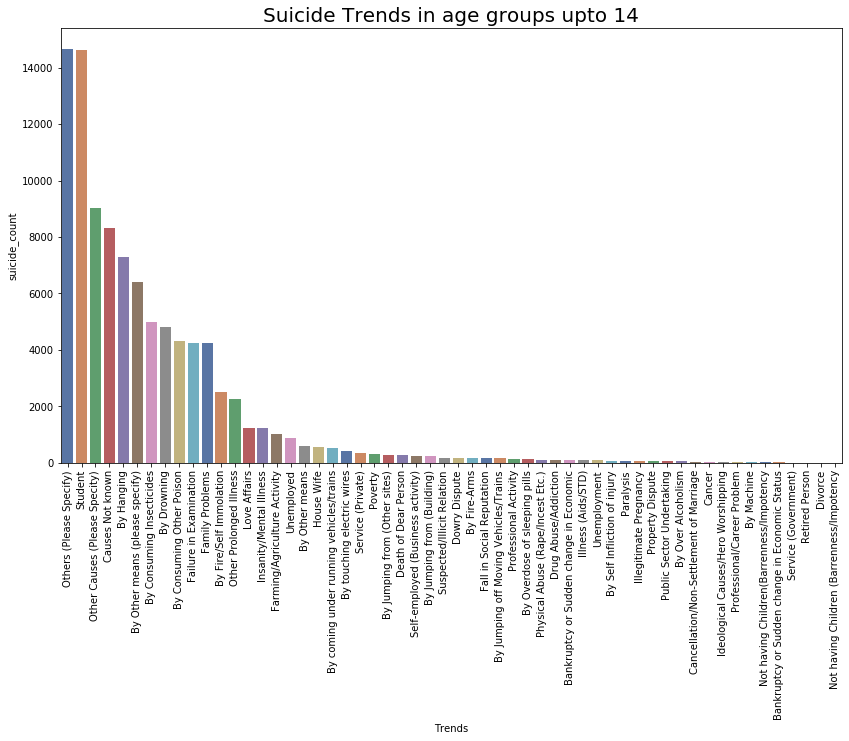

In [24]:
x= pd.DataFrame(df_age0.groupby(['Type'])['Total'].sum().reset_index())
x.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(14,8))
sns.barplot(x['Type'], y = x['Total'], data = x, palette = 'deep')
plt.title('Suicide Trends in age groups upto 14', fontsize = 20)
plt.xlabel('Trends')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

### Most preffered way of commiting suicide: Hanging
### Most common profession: Student
### Most common cause : Failure examinations

## 5. Trends in Education status of suicide victims

In [30]:
df_education = df_in[df_in.Type_code == 'Education_Status']

In [204]:
df_education

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


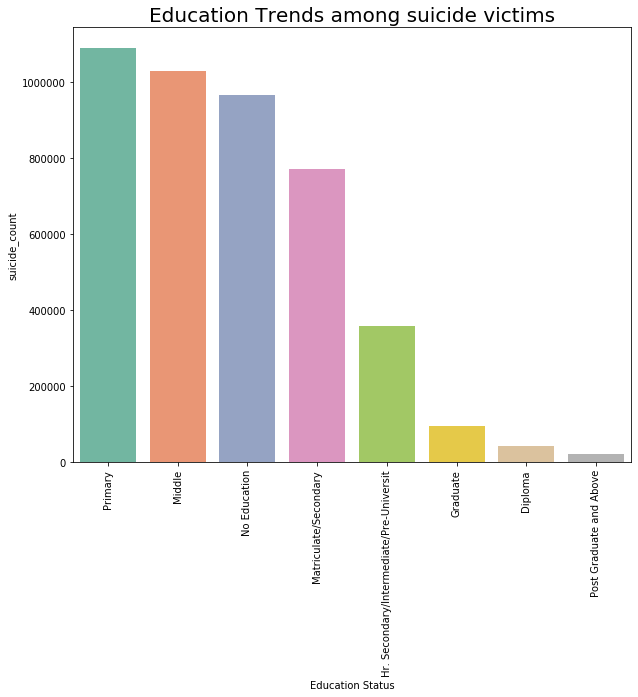

In [32]:
df_education2= pd.DataFrame(df_education.groupby(['Type'])['Total'].sum().reset_index())
df_education2.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_education2['Type'], y = df_education2['Total'], data = df_education2, palette = 'Set2')
plt.title('Education Trends among suicide victims', fontsize = 20)
plt.xlabel('Education Status')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

## 6. Causes for committing suicide

In [4]:
df_cause = df_in[df_in.Type_code == 'Causes']
df_means = df_in[df_in.Type_code == 'Means_adopted']
df_pro = df_in[df_in.Type_code == 'Professional_Profile']
df_social = df_in[df_in.Type_code == 'Social_Status']

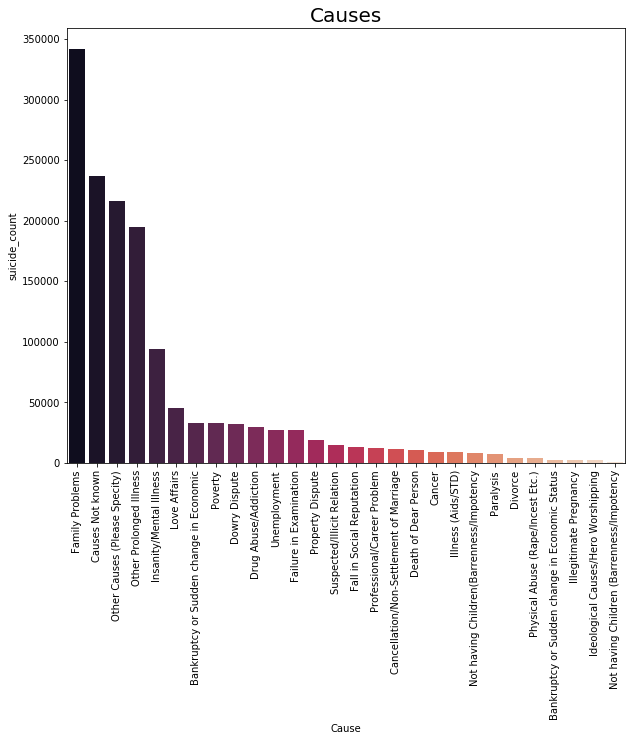

In [7]:
df_cs= pd.DataFrame(df_cause.groupby(['Type'])['Total'].sum().reset_index())
df_cs.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_cs['Type'], y = df_cs['Total'], data = df_cs, palette = 'rocket')
plt.title('Causes', fontsize = 20)
plt.xlabel('Cause')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

## 7. Means adopted to commit suicide

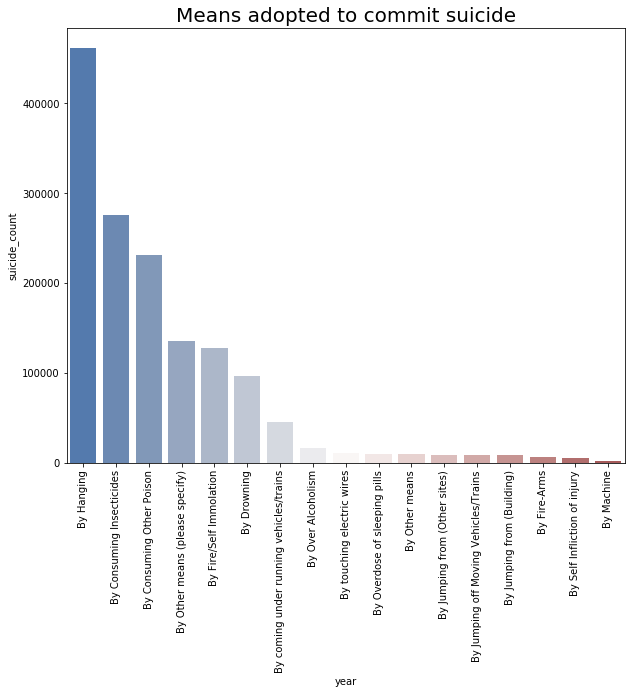

In [8]:
df_mean= pd.DataFrame(df_means.groupby(['Type'])['Total'].sum().reset_index())
df_mean.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_mean['Type'], y = df_mean['Total'], data = df_mean, palette = 'vlag')
plt.title('Means adopted to commit suicide', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

## 8. Professions of Suicide Victims

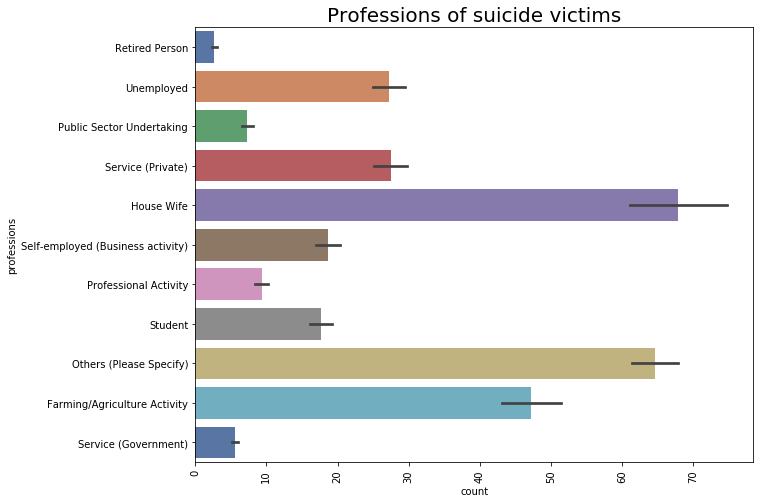

In [9]:
df_pr= pd.DataFrame(df_pro.groupby(['Type'])['Total'].sum().reset_index())
df_pr.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_pro['Total'], y = df_pro['Type'], data = df_pro, palette = 'deep')
plt.title('Professions of suicide victims', fontsize = 20)
plt.xlabel('count')
plt.xticks(rotation =90)
plt.ylabel('professions')
plt.show()

## 9. Marital status of Suicide Victims

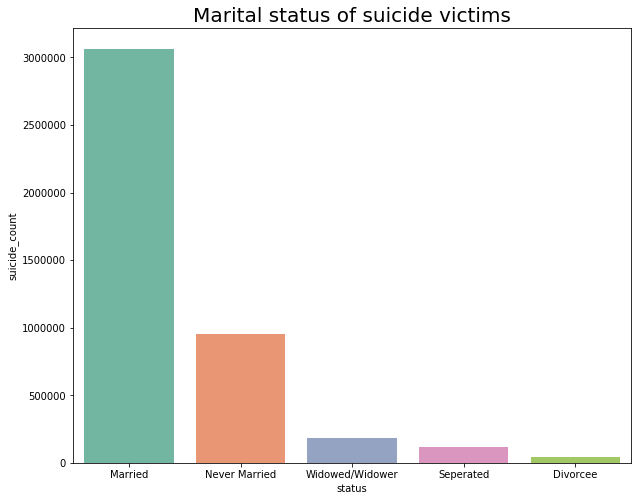

In [33]:
df_s= pd.DataFrame(df_social.groupby(['Type'])['Total'].sum().reset_index())
df_s.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_s['Type'], y = df_s['Total'], data = df_s, palette = 'Set2')
plt.title('Marital status of suicide victims', fontsize = 20)
plt.xlabel('status')
plt.ylabel('suicide_count')
plt.show()

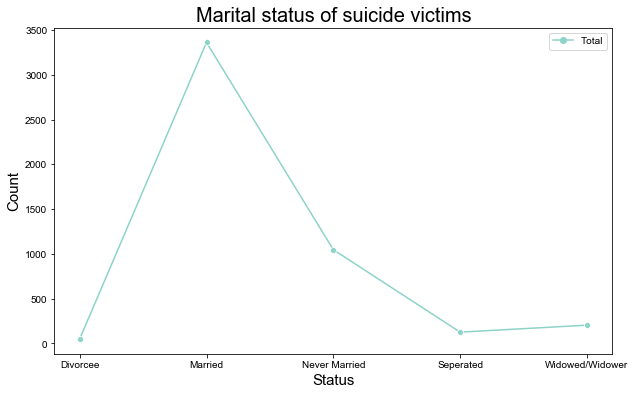

In [34]:
plt.figure(figsize=(10,6))
df_months = df_social[['Total', 'Type','Age_group']].groupby('Type')
sns.lineplot(data = df_months.mean(),palette = "Set3", markers = True)
sns.set(style="white")
plt.title('Marital status of suicide victims', fontsize = 20)
plt.xlabel("Status", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Model Building

## Label Encoding

In [256]:
df_in.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [3]:
data = pd.read_csv("Suicides in India 2001-2012.csv")

In [5]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Age_group'] = le.fit_transform(data['Age_group'])
data['Type'] = le.fit_transform(data['Type'])
data['Type_code'] = le.fit_transform(data['Type_code'])
data['State'] = le.fit_transform(data['State'])

In [6]:
data.describe()

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519.000000,237519.000000,237519.000000,237519.000000,237519.000000,237519.000000,237519.000000
mean,17.408936,2006.500448,1.295581,33.350364,0.500503,2.850324,55.034477
std,10.675855,3.452240,1.287528,20.319914,0.500001,1.524694,792.749038
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2004.000000,0.000000,16.000000,0.000000,2.000000,0.000000
50%,17.000000,2007.000000,2.000000,31.000000,1.000000,3.000000,0.000000
75%,26.000000,2010.000000,2.000000,51.000000,1.000000,4.000000,6.000000
max,37.000000,2012.000000,4.000000,68.000000,1.000000,5.000000,63343.000000


## Correlation Matrix

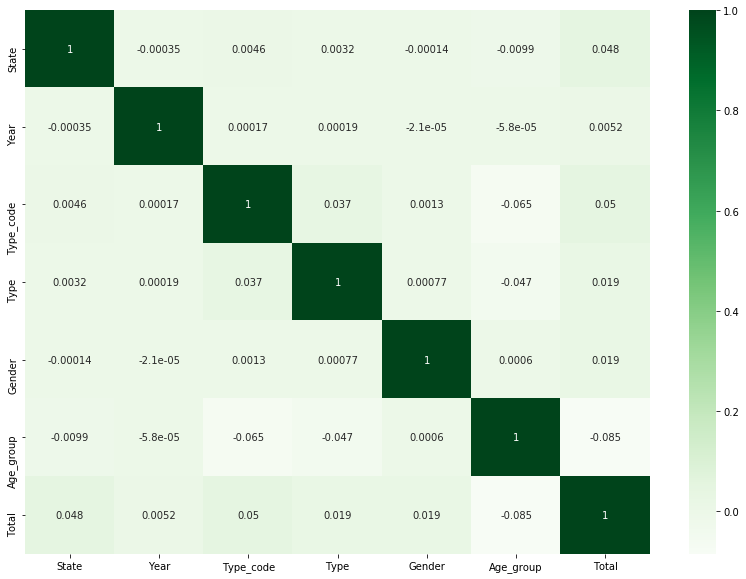

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

## Dividing data into train and test datasets

In [8]:
x = data.drop(['Total'], axis = 1)
label = data['Total']

print(x.shape)
print(label.shape)

(237519, 6)
(237519,)


In [9]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178139, 6)
(178139,)
(59380, 6)
(59380,)


## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Linear Regression

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 543503.9845864472
RMSE : 737.2272272416743
r2_score : 0.012351316781467614


#### The accuracy of the algorithm is very low in this case, hence we cannot use this algorithm.

## Random Forest Regressor

In [270]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 1022.2104401807302
RMSE : 31.972025900476343
r2_score : 0.9981424518975975


#### The accuracy of the algorithm is very high (99%). 

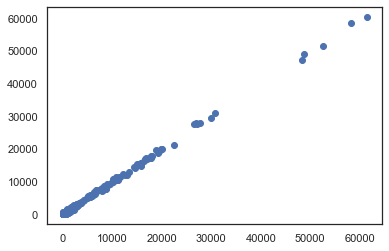

In [271]:
plt.scatter(y_test, y_pred)

In [275]:
import pickle
with open("suicidemodel.pickle", "wb")as f:
    pickle.dump(model, f)

In [281]:
df = px.data.gapminder()

In [284]:
x = pd.merge(df_who, df, on = 'country')
x = x[['country', 'suicides_no','year_x','population','iso_alpha']]

In [286]:
import bz2

In [291]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f: 
        pickle.dump(data, f)

In [292]:
compressed_pickle('example_cp', model)

In [ ]:
import plotly.express as px

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

df = px.data.gapminder()
fig = px.choropleth(x,
                    locations="iso_alpha", 
                    color="suicides_no", 
                    hover_name="country",
                    animation_frame="year_x", 
                    range_color=[20,80],
                    )
fig.show()